In [ ]:
# In this breast cancer dataset, 99.27% of the records are 'non-cancer'. There are only 0.73% cancer cases.
# If we train models uwithout addressing the issues, we will get extremely high accuracies, but
# we won't have any meaningful predictions for the minority class.
# accuracy isn't the right measure, we should look at measures like recall, precision, F1-scores.

In [114]:
import pandas as pd
import numpy as np
df = pd.read_csv('bcse_cleaned.csv')

#drop the columns 'invasive' for training as it is dependent on the target column 'cancer'
df.drop("invasive", inplace=True, axis=1)
df

,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,cancer,training
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0,1
1,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0,1
2,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0,1
3,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0,0
4,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007655,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1007656,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1007657,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1007658,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007660 entries, 0 to 1007659
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   menopaus  918921 non-null   float64
 1   agegrp    951427 non-null   float64
 2   density   731522 non-null   float64
 3   race      836129 non-null   float64
 4   Hispanic  800303 non-null   float64
 5   bmi       441014 non-null   float64
 6   agefirst  441453 non-null   float64
 7   nrelbc    847661 non-null   float64
 8   brstproc  898608 non-null   float64
 9   lastmamm  680863 non-null   float64
 10  surgmeno  439926 non-null   float64
 11  hrt       541823 non-null   float64
 12  cancer    1007660 non-null  int64  
 13  training  1007660 non-null  int64  
dtypes: float64(12), int64(2)
memory usage: 107.6 MB


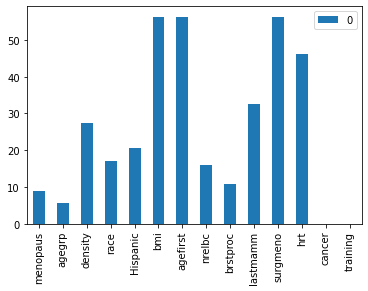

In [69]:
# percentage of nulls for each column

#(df.isna().sum())/(df.shape[0]/100)
pd.DataFrame((df.isna().sum())/(df.shape[0]/100)).plot.bar()

In [70]:
# calculate the % nulls in each colum and convert it to a dataframe to plot it using seaborn
df_nulls_perc = pd.DataFrame((df.isna().sum())/(df.shape[0]/100))
#rename the column
df_nulls_perc.columns = ["percent"]
df_nulls_perc

,percent
menopaus,8.806443
agegrp,5.580553
density,27.403886
race,17.022706
Hispanic,20.578072
bmi,56.233849
agefirst,56.190282
nrelbc,15.878272
brstproc,10.822301
lastmamm,32.431276


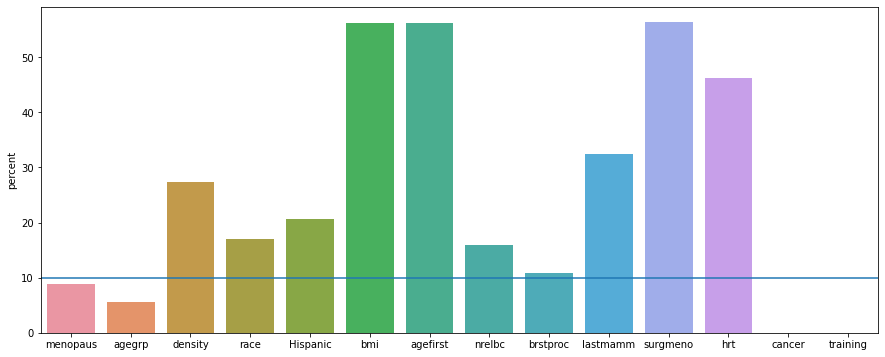

In [71]:
# a better way to plot the missing values
# Set the width and height of the figure
plt.figure(figsize=(15,6))

import seaborn as sns
import matplotlib.pyplot as plt

bar_chart = sns.barplot(x= df_nulls_perc.index, y="percent", data = df_nulls_perc)

#used a threshold line of 10% missing values
bar_chart.axhline(10)
plt.show()

In [72]:
# split data into training and testing
df_train = df.loc[df.training == 1].copy()
df_test = df.loc[df.training== 0].copy()

In [108]:
# cancer rows % in whole trainingdata
df_train.cancer.value_counts()[1]/df_train.shape[0]

0.007285788941000589

In [109]:
# cancer rows % in training data with no missing values in any columns
df_train.dropna().cancer.value_counts()[1]/df_train.dropna().shape[0]

0.008259377588451071

In [110]:
# cancer rows % in test data with no missing values in any columns
df_test.dropna().cancer.value_counts()[1]/df_test.dropna().shape[0]

0.007223573165498498

In [93]:
cols_to_drop = ["cancer","training"]

In [94]:
# Let's start with a model which considers all NON-NULL rows in training and test data

X_train = df_train.dropna().copy()
y_train = X_train.cancer.copy()
X_train.drop(cols_to_drop, inplace=True, axis=1)
X_train

,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt
280205,1.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
280206,1.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
280207,1.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
280208,1.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
280209,1.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
910418,1.0,10.0,4.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
910806,1.0,10.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
910810,1.0,10.0,4.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
910813,1.0,10.0,4.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0


In [95]:
# only non-null rows in test data

X_test = df_test.dropna().copy()
y_test = X_test.cancer.copy()
X_test.drop(cols_to_drop,inplace=True, axis=1)
X_test

,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt
280213,1.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
280214,1.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
280250,1.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
280271,1.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
280315,1.0,3.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
910325,1.0,10.0,4.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0
910380,1.0,10.0,4.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
910402,1.0,10.0,4.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
910420,1.0,10.0,4.0,1.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0


In [100]:
# model with an ACCURACY OF 99.28%!!

# we are going to train a basic model, ignoring the class imbalances.
# we notice the model gives an accuracy of 99.28%!!! Did I create an omniscient model?
# Unfortunartely no, and the reason for such high accuracy is expalined in the next cell.

import xgboost as xgb
from sklearn.metrics import accuracy_score

model_xgb = xgb.XGBClassifier()

#fit
model_xgb.fit(X_train, y_train)

#predict
pred = model_xgb.predict(X_test)

# score
accuracy_score(y_test, pred)

[16:02:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9927764268345015

In [107]:
# we calculate the proportion of non-cancer values out of all the test data.
# as we can see, this number EXACTLY matches our model accuracy.
# This means our model predicted everything as non-cancer, and even though it has a high accuracy,
# IT DIDN'T PREDICT A SINGLE CANCER CASE. So the MODEL HAS NO UTILITY.

# proportion of non-cancer values in the test data
df_test.dropna().cancer.value_counts()[0]/df_test.dropna().shape[0]

0.9927764268345015

In [101]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, pred)

print(cf_matrix)

[[13881     0]
 [  101     0]]


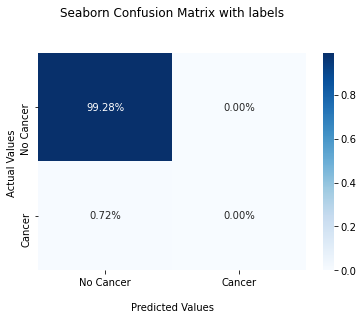

In [117]:
# we can see our basic model has a high accuracy but didn't predict any cancer cases.
# we have to address the class imbalance issues before we can train the model and make any meaningful predictions.

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No Cancer','Cancer'])
ax.yaxis.set_ticklabels(['No Cancer','Cancer'])

## Display the visualization of the Confusion Matrix.
plt.show()